# of galaxies 763


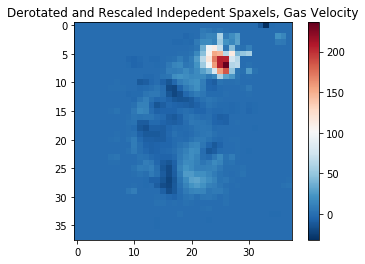

8997-12702.fits
8600-12701.fits
8555-12703.fits
8933-6102.fits
8597-12704.fits
7962-12701.fits
8262-12703.fits
8255-12703.fits
8625-12702.fits
8458-12702.fits
8147-12702.fits
8937-3702.fits
8946-12703.fits
8329-12704.fits
8945-6104.fits
7815-12704.fits
9509-12704.fits
8466-9101.fits
9038-12705.fits
8465-12705.fits
8618-12705.fits
8949-1901.fits
9183-12704.fits
9037-12703.fits
9000-12703.fits
8250-12702.fits
9869-12705.fits
8253-1901.fits
8456-12701.fits
8326-12702.fits
8249-12703.fits
8145-1902.fits
8999-12701.fits
9870-12704.fits
8992-12703.fits
9485-12705.fits
8550-12702.fits
8717-6102.fits
7975-12703.fits
8078-12702.fits
7968-3703.fits
8938-12703.fits
9035-12705.fits
8615-12705.fits
8447-3701.fits
8252-12704.fits
8484-12703.fits
8990-12705.fits
8084-3702.fits
8940-12701.fits
7990-12701.fits
7958-12701.fits
7964-12703.fits
8462-12702.fits
8727-3704.fits
8258-12703.fits
8455-12702.fits
8999-6102.fits
8447-12701.fits
8941-12704.fits
8241-12702.fits
8312-12701.fits
8153-12703.fits
8936-

9490-3702.fits
8995-6101.fits
7990-12704.fits
9876-6104.fits
9034-12705.fits
7958-12704.fits
8591-12703.fits
8623-12705.fits
8991-12705.fits
8447-12704.fits
8941-12701.fits
8932-6101.fits
8603-6102.fits
8567-1901.fits
9486-12703.fits
8995-12701.fits
8945-12705.fits
8602-12702.fits
7972-12701.fits
9865-12705.fits
8451-12703.fits
8333-12703.fits
9512-9102.fits
8145-12701.fits
9088-12702.fits
8317-12705.fits
9028-12705.fits
8439-12704.fits
8466-3704.fits
9031-12704.fits
8462-3701.fits
8144-12704.fits
8626-12704.fits
9883-12704.fits
8611-12704.fits
8466-6101.fits
8551-12705.fits
8938-12701.fits
7495-12705.fits
9883-3703.fits
8718-3701.fits
8948-12702.fits
8309-12704.fits
9036-12704.fits
8450-9101.fits
7992-12705.fits
8996-9101.fits
7443-9102.fits
8726-12702.fits
7975-12701.fits
8992-12701.fits
9085-12705.fits
8942-12705.fits
8249-12701.fits
8456-12703.fits
8149-12703.fits
8980-12702.fits
8461-12703.fits
9497-12704.fits
8086-12705.fits
9037-12701.fits
8258-3704.fits
8549-12701.fits
8263-127

In [31]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
# There has gotta be a faster way to just reload a couple of galaxies
# This will yield a tuple for each subdirectory. Ths first entry in the 3-tuple is a directory name, so:

plates = os.listdir('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_derotated_and_rescaled/')
#plates_e = os.listdir('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_e/')

#[x[0] for x in os.walk('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps/')]
#print('plates',plates)
print('# of galaxies', len(plates))



number = 14

# import test to get shape
im = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_derotated_and_rescaled/'+str(plates[0]))[number-1].data

file = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_derotated_and_rescaled/'+str(plates[0]))[0].header
#print(file)
plt.clf()
plt.imshow(im, cmap='RdBu_r')
plt.title(file['EXT'+str(number)])
plt.colorbar()
plt.show()



shape = np.shape(im)[0]
map_array_ml = np.zeros((len(plates),shape, shape))#np.zeros((len(plateifu_list),74**2))
map_array_ml_e = np.zeros((len(plates),shape, shape))#np.zeros((len(plateifu_list),74**2))

ifu_name=[]

counter=0


r_eff_list=[]

for j in range(len(plates)):
    #initial_split = str((re.split('_',plates[j]))[2])
    print(plates[j])
    ifu_1 = re.split('-',(plates[j]))[0]
    
    try:
        ifu_2_split = re.split('-',(plates[j]))[1]
    except IndexError:
        # This means its not a file we want
        continue
    ifu_2 = re.split('.f',(ifu_2_split))[0]
    
    ifu_name.append(str(ifu_1)+'-'+str(ifu_2))
    
    mapit = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_derotated_and_rescaled/'+str(plates[j]))[number-1].data
    
    
    map_array_ml[j,:,:] = mapit
    
    '''mapit_e = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_derotated_and_rescaled/'+str(plates[j]))[1].data
    map_array_ml_e[j,:] = np.reshape(mapit_e,(shape**2))
    # I think 'reff' is actually in arcsec 0.5"/pixel
    
    r_eff_list.append(2*float(pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps/'+str(plates[j]))[0].header['REFF']))
    #existing_plateifus.append(str(re.split('/',plates[j])[-2])+'-'+str(re.split('/',plates[j])[-1]))'''
print(ifu_name)

### Implement a PCA to play with how reducing the data might help you (in dimensions)
It's important to first standardize data in PCA

In [32]:
# Maybe unflatten it first?


data = map_array_ml#np.reshape(map_array_ml,(np.shape(map_array_ml)[0],shape,shape))
n_galaxies = np.shape(data)[0]#np.shape(map_array_ml)[0]


MB_matrix = np.zeros(( np.shape(data)[0],data[0,:,:].size))
for i in range(np.shape(data)[0]):
    MB_array = data[i,:,:].flatten()
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()
    MB_matrix[i,:] = MB_arrayStd

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


[-0.172 -0.172 -0.172 ... -0.172 -0.172 -0.172]


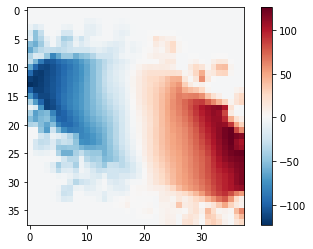

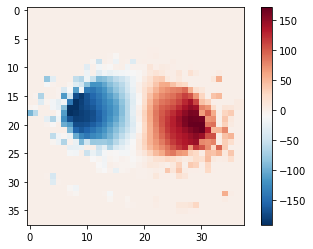

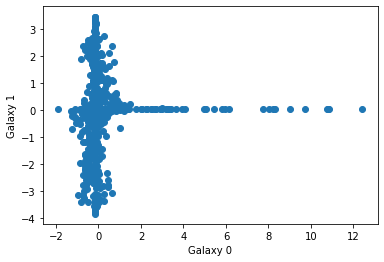

In [33]:
for j in range(np.shape(data)[0]):
    
    if np.isnan(data[j,:,:].any()) or np.isinf(data[j,:,:].any()):
        plt.clf()
        plt.imshow(data[j,:,:], cmap='RdBu_r')
        plt.show()
        STOP

print(MB_matrix[0,:])

plt.imshow(data[202,:,:], cmap='RdBu_r')
plt.colorbar()
plt.show()

plt.imshow(data[1,:,:], cmap='RdBu_r')
plt.colorbar()
plt.show()


plt.scatter(MB_matrix[0,:],MB_matrix[1,:])
plt.xlabel('Galaxy 0')
plt.ylabel('Galaxy 1')
plt.show()

In [34]:
# You need to remove all rows of this matrix where all entries are zeros

'''x,y = np.where(np.isnan(MB_matrix))
print(x, y)
print(MB_matrix[x,y])
plt.clf()
plt.imshow(full_data[x[0],:,:], cmap='RdBu_r')
plt.colorbar()
plt.show()

print(full_data[x[0],:,:])'''

MB_matrix_cleaned = MB_matrix[~np.isnan(MB_matrix).any(axis=1)]
print(np.shape(MB_matrix))


# Covariance
np.set_printoptions(precision=3)
cov = np.cov(MB_matrix_cleaned)#.transpose())
# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)
print("Eigenvalues:\n\n", EigVal,"\n")

(763, 1444)
Eigenvalues:

 [ 3.050e+02  7.762e+01  4.353e+01  2.538e+01  2.092e+01  1.678e+01
  1.407e+01  1.032e+01  9.027e+00  7.723e+00  7.457e+00  6.661e+00
  5.652e+00  5.454e+00  4.828e+00  4.331e+00  4.103e+00  4.050e+00
  3.698e+00  3.199e+00  3.076e+00  2.970e+00  2.696e+00  2.610e+00
  2.545e+00  2.476e+00  2.271e+00  2.233e+00  2.185e+00  2.094e+00
  2.022e+00  1.953e+00  1.895e+00  1.827e+00  1.749e+00  1.696e+00
  1.688e+00  1.601e+00  1.571e+00  1.542e+00  1.503e+00  1.485e+00
  1.453e+00  1.418e+00  1.372e+00  1.347e+00  1.313e+00  1.302e+00
  1.300e+00  1.272e+00  1.256e+00  1.236e+00  1.228e+00  1.214e+00
  1.198e+00  1.194e+00  1.181e+00  1.164e+00  1.135e+00  1.126e+00
  1.108e+00  1.100e+00  1.087e+00  1.080e+00  1.061e+00  1.056e+00
  1.045e+00  1.038e+00  1.025e+00  1.021e+00  9.904e-01  9.789e-01
  9.738e-01  9.519e-01  9.417e-01  9.066e-01  9.213e-01  9.249e-01
  9.142e-01  8.943e-01  8.915e-01  8.783e-01  8.680e-01  8.560e-01
  8.470e-01  8.347e-01  8.283e-01  

In [35]:
# Ordering Eigen values and vectors
n_PCAs = 10
order = EigVal.argsort()[::-1][:n_PCAs]
EigVal = EigVal[order]
EigVec = EigVec[:,order]
#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(MB_matrix_cleaned.transpose(),EigVec)   #cross product

print(order)
print('eigval', EigVal)

[0 1 2 3 4 5 6 7 8 9]
eigval [305.036  77.625  43.531  25.385  20.923  16.78   14.069  10.322   9.027
   7.723]


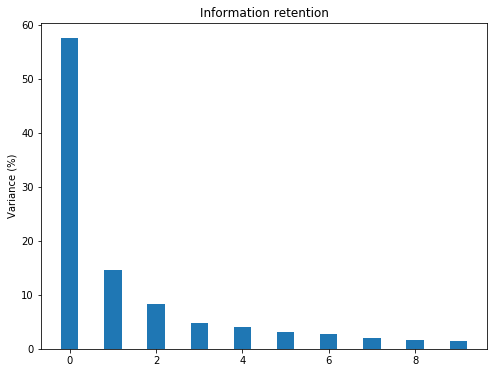

In [36]:
#Information Retained by Principal Components
plt.figure(figsize=(8,6))
plt.bar(range(n_PCAs),EigVal/sum(EigVal)*100,align='center',width=0.4)
plt.ylabel('Variance (%)')
plt.title('Information retention');

Text(0.5, 0.98, 'Pair plot of PCs')

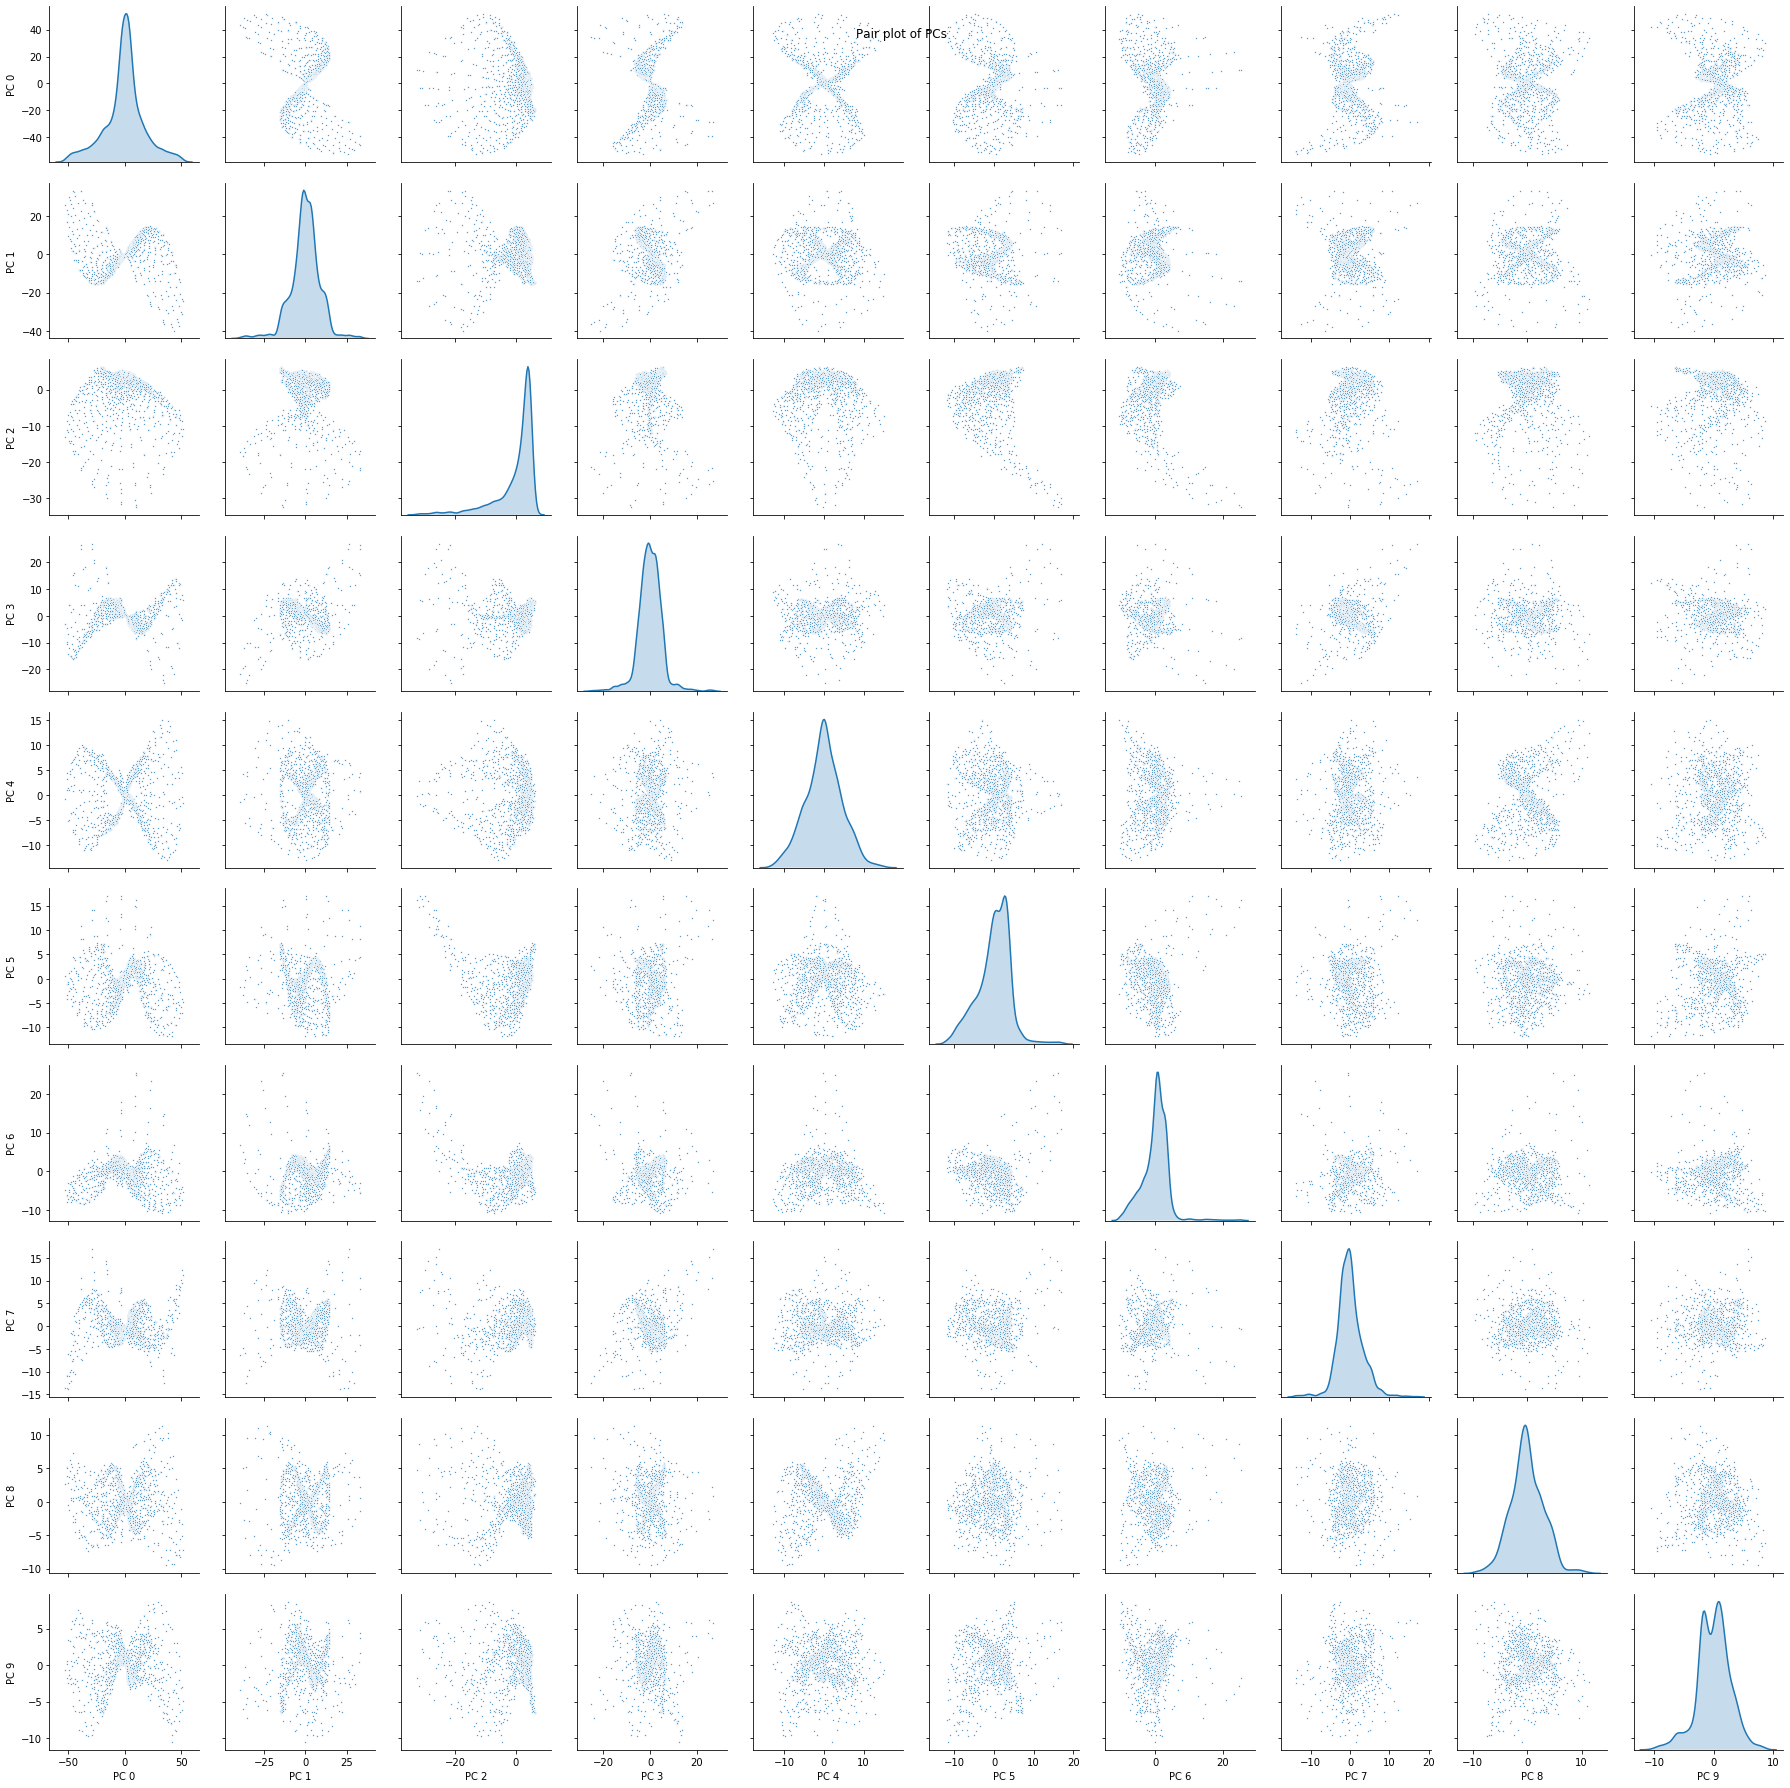

In [37]:
import seaborn as sns
import pandas as pd
# Generate Paiplot for original data and transformed PCs
'''Bandnames = ['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7']
a = sns.pairplot(pd.DataFrame(MB_matrix.transpose(),
                columns = Bandnames),
                 diag_kind='kde',plot_kws={"s": 3})
a.fig.suptitle("Pair plot of Band images")'''
PCnames = ['PC '+str(i) for i in range(n_PCAs)]
b = sns.pairplot(pd.DataFrame(PC,
                columns = PCnames),
                 diag_kind='kde',plot_kws={"s": 3})
b.fig.suptitle("Pair plot of PCs")

### Now try converting back into the images to visualize what each of the principal components are

In [38]:
# Rearranging 1-d arrays to 2-d arrays of image size
print(np.shape(PC))
PC_2d = np.zeros((n_galaxies, shape, shape))
for i in range(n_PCAs):
    PC_2d[i,:,:] = PC[:,i].reshape(-1,shape)
# normalizing between 0 to 255
'''PC_2d_Norm = np.zeros((n_galaxies, shape, shape))
for i in range(n_bands):
    PC_2d_Norm[i,:,:] = cv2.normalize(PC_2d[i,:,:],
                    np.zeros((shape,shape)),0,255 ,cv2.NORM_MINMAX)'''



(1444, 10)


'PC_2d_Norm = np.zeros((n_galaxies, shape, shape))\nfor i in range(n_bands):\n    PC_2d_Norm[i,:,:] = cv2.normalize(PC_2d[i,:,:],\n                    np.zeros((shape,shape)),0,255 ,cv2.NORM_MINMAX)'

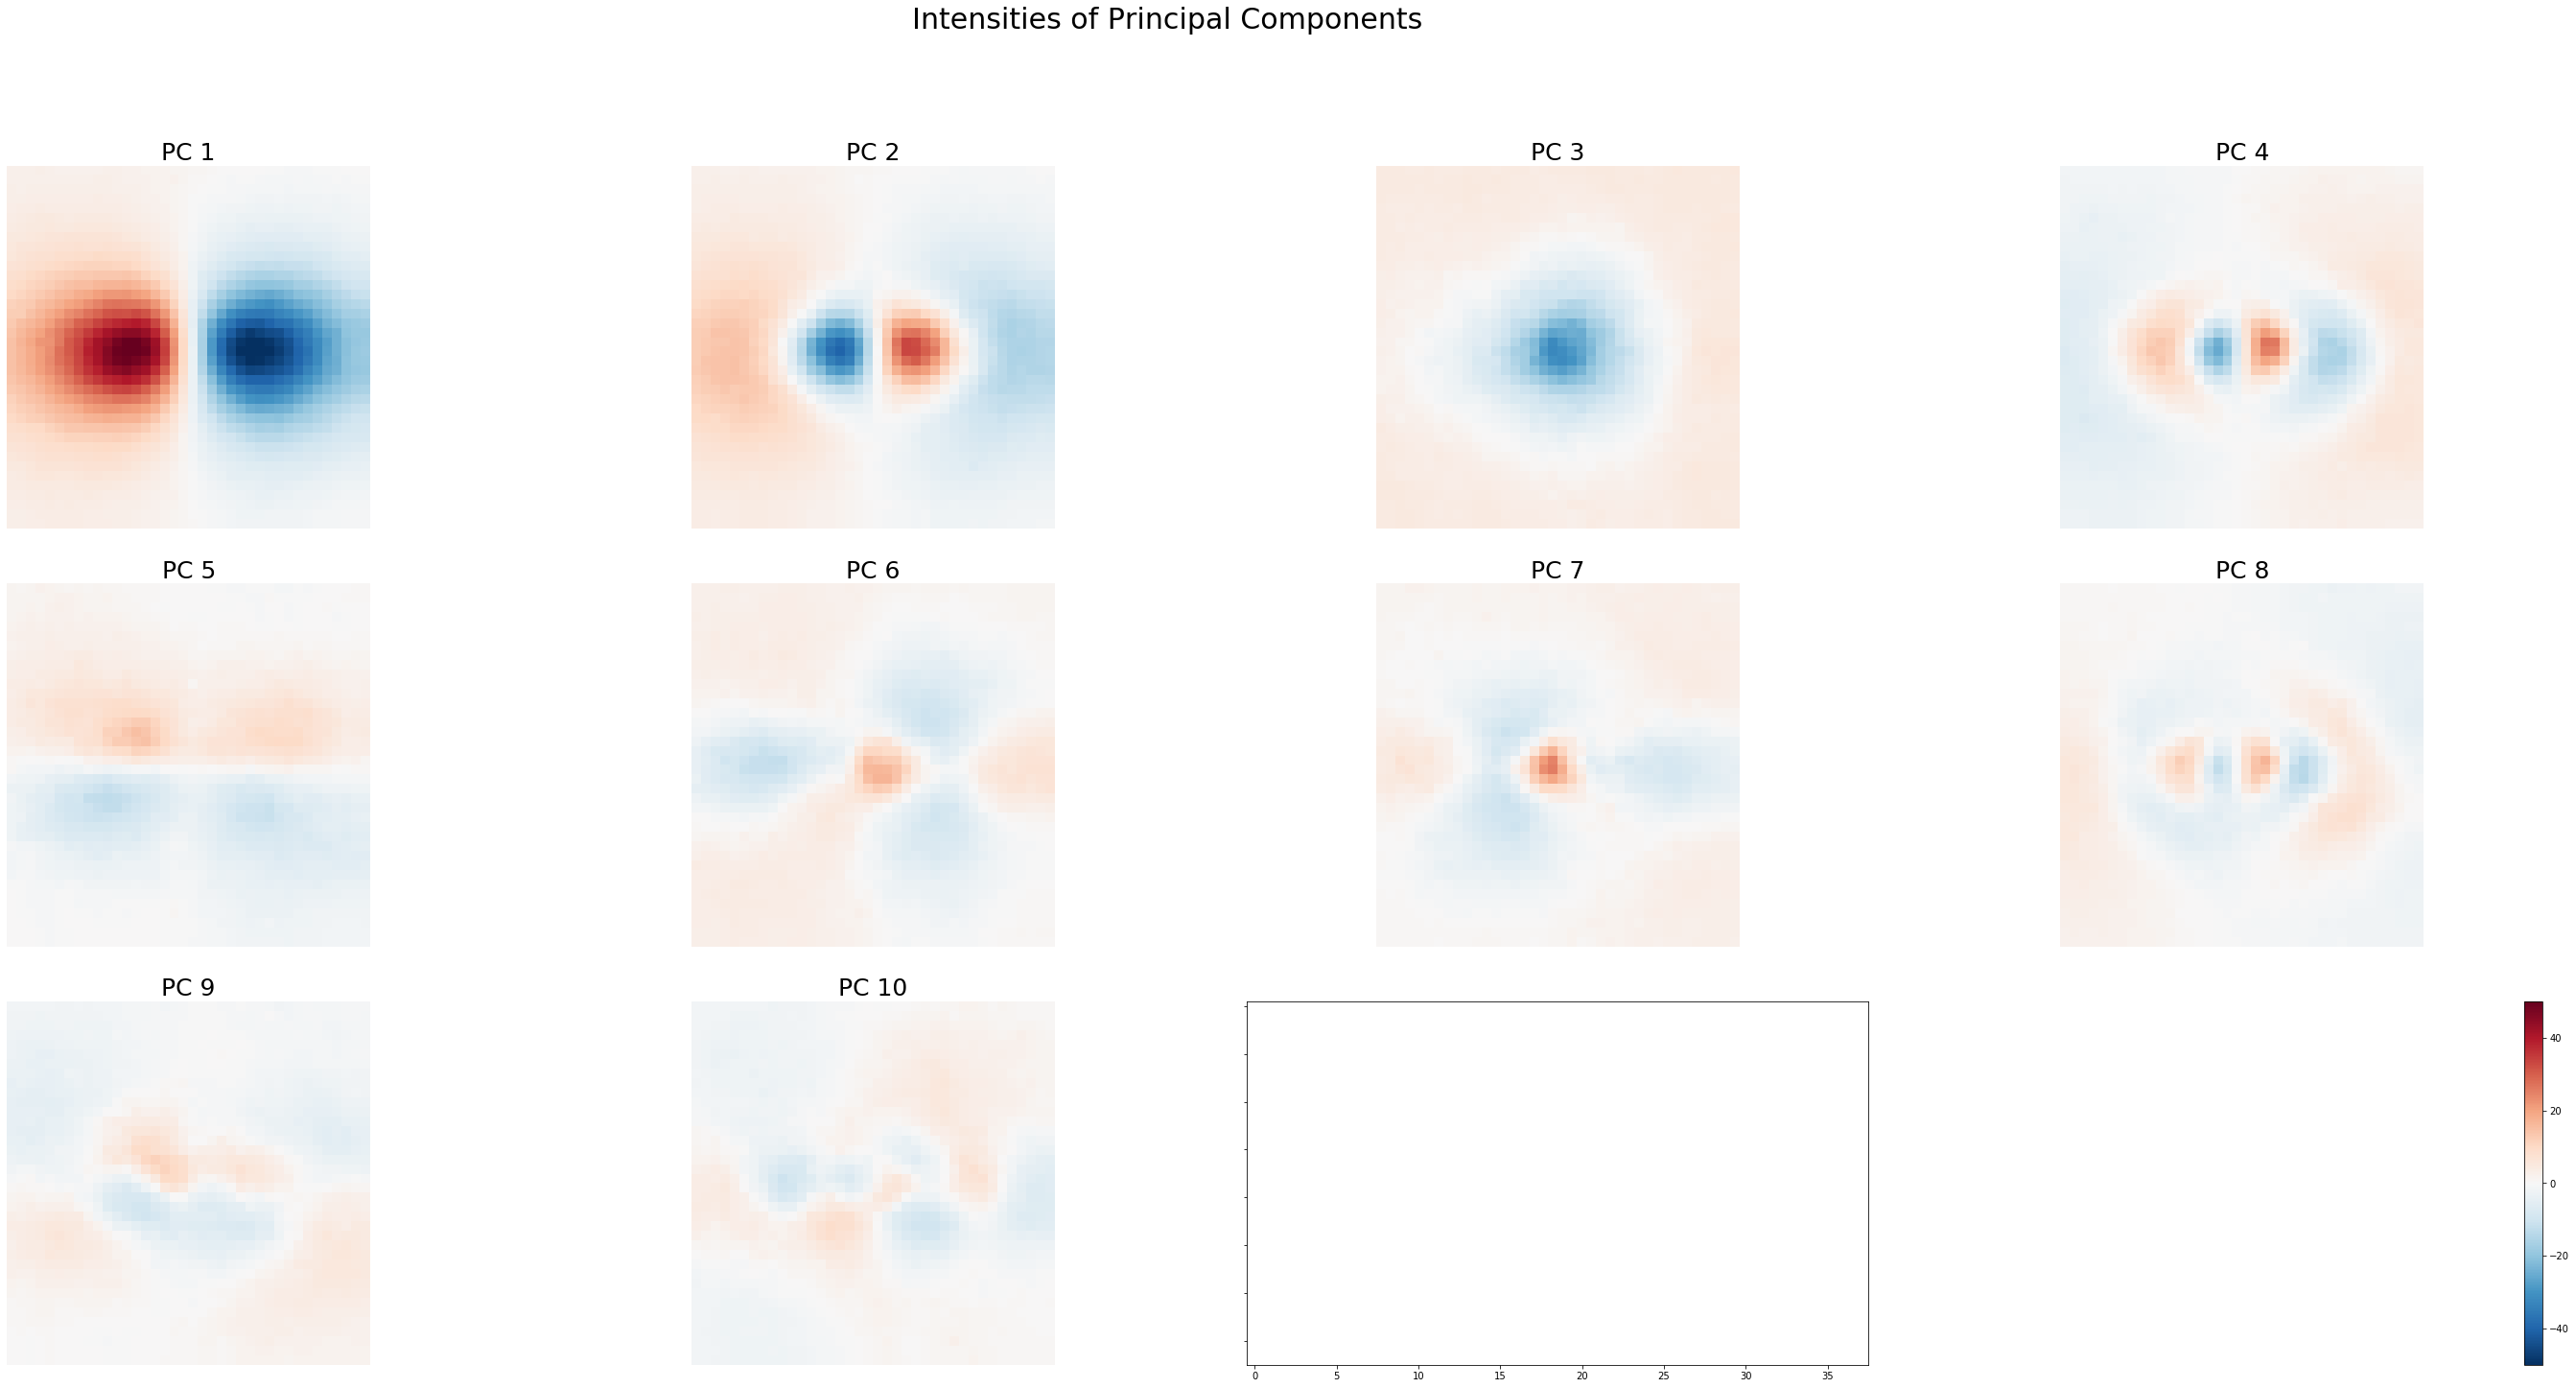

In [39]:
fig,axes = plt.subplots(3,4,figsize=(50,23),sharex='all',
                        sharey='all')
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Intensities of Principal Components ', fontsize=30)
axes = axes.ravel()
for i in range(n_PCAs):
    
    im = axes[i].imshow(PC_2d[i,:,:],cmap='RdBu_r', vmin=-50, vmax=50)
    axes[i].set_title('PC '+str(i+1),fontsize=25)
    axes[i].axis('off')
    
plt.colorbar(im, fraction=0.046)
fig.delaxes(axes[-1])

### How to reconstruct a given galaxy?

In [40]:
from sklearn.decomposition import PCA as RandomizedPCA
# Compute the components and projected faces
n_comps = 20# was 40
pca = RandomizedPCA(n_comps).fit(MB_matrix_cleaned)
components = pca.transform(MB_matrix_cleaned)
projected = pca.inverse_transform(components)

In [41]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=n_comps,random_state=0)
ICA_components = ica.fit_transform(MB_matrix_cleaned)
ICA_projected = ica.inverse_transform(ICA_components)

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

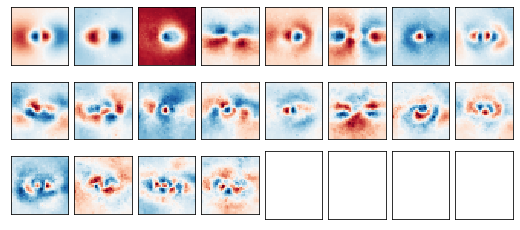

<Figure size 432x288 with 0 Axes>

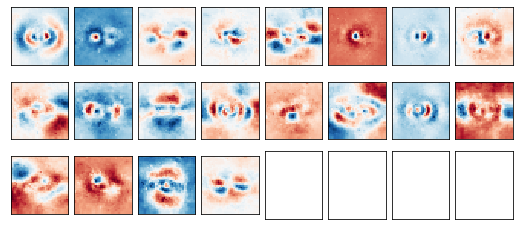

In [42]:
plt.clf()

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(pca.components_[i].reshape(shape,shape), cmap='RdBu_r')
    except IndexError:
        break
plt.show()
plt.clf()
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(ica.components_[i].reshape(shape,shape), cmap='RdBu_r')
    except IndexError:
        break
plt.show()

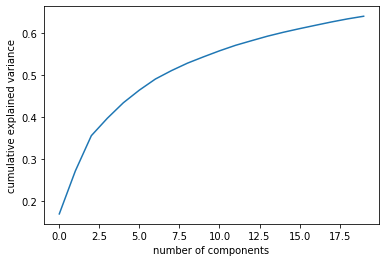

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


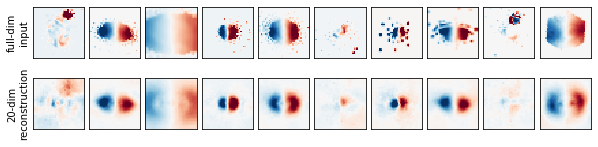

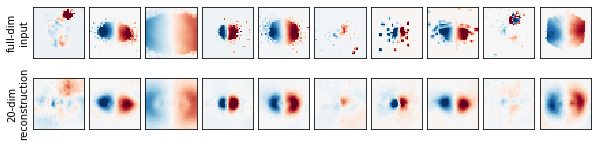

In [44]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(MB_matrix_cleaned[i].reshape(shape,shape), cmap='RdBu_r',norm=MidpointNormalize(midpoint=0, vmin=-3, vmax=3))
    ax[1, i].imshow(projected[i].reshape(shape,shape), cmap='RdBu_r',norm=MidpointNormalize(midpoint=0, vmin=-3, vmax=3))
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(n_comps)+'-dim\nreconstruction');

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(MB_matrix_cleaned[i].reshape(shape,shape), cmap='RdBu_r',norm=MidpointNormalize(midpoint=0, vmin=-3, vmax=3))
    ax[1, i].imshow(ICA_projected[i].reshape(shape,shape), cmap='RdBu_r',norm=MidpointNormalize(midpoint=0, vmin=-3, vmax=3))
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel(str(n_comps)+'-dim\nreconstruction');

### Time to do another UMAP 

(762, 2)


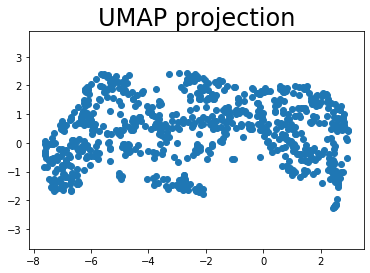

(762, 2)


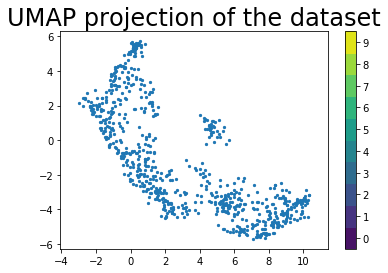

In [45]:
# Feed it either projected, which has been PCA'ed, or the original data
input_maps = MB_matrix_cleaned


import umap.umap_ as umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(input_maps)# either put projected or MB_matrix_cleaned

print(embedding.shape)
plt.clf()
plt.scatter(embedding[:,0], embedding[:,1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.show()
plt.clf()
# So now you can try to run a t-SNE or a UMAP on the reconstructed maps?
reducer = umap.UMAP(random_state=24)
reducer.fit(projected)
embedding = reducer.transform(input_maps)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
#assert(np.all(embedding == reducer.embedding_))
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24)
plt.show()

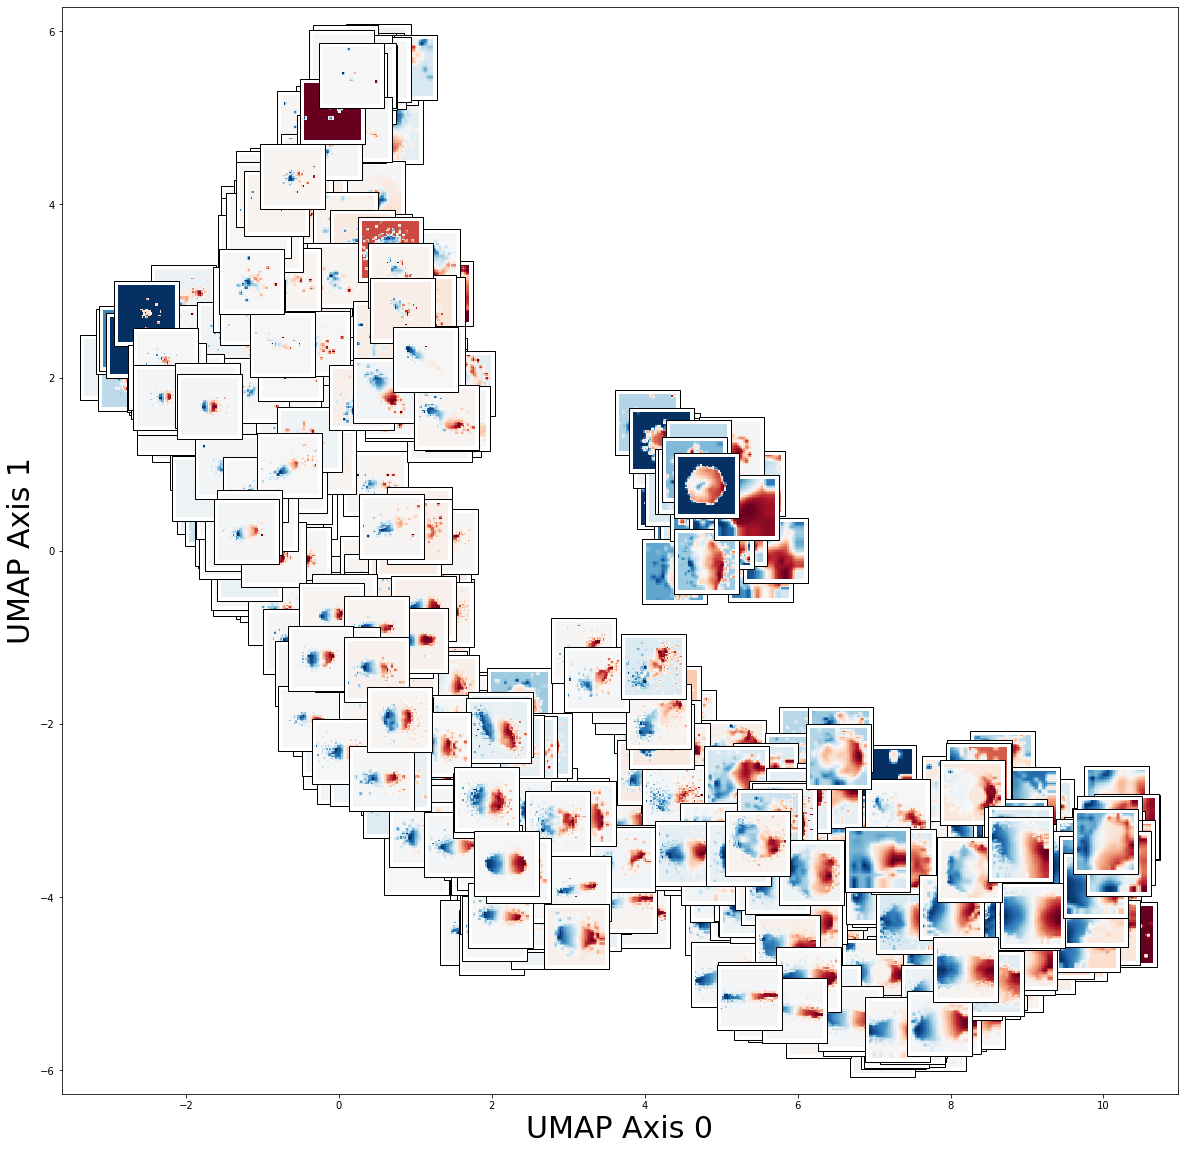

In [46]:
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from matplotlib import pyplot as plt


class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
    #elev_min=-150
    #elev_max=3000
    


# Imscatter is a cool tool that allows you to overplot
# the velocity maps as the points.
def imscatter(x, y, images, mid_val, ax=None, zoom=0.01):     
        if ax is None:         
                ax = plt.gca()           
        x, y = np.atleast_1d(x, y)     
        artists = []     
        for x0, y0, image0 in zip(x, y, images):
                ima = image0
                im = OffsetImage(ima, zoom=zoom, cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#mid_val))   
                ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True)         
                artists.append(ax.add_artist(ab))     
        ax.update_datalim(np.column_stack([x, y]))     
        ax.autoscale()     
        return artists
#np.reshape(map_array_ml[j,:],(shape,shape))
twod = np.reshape(input_maps, (np.shape(input_maps)[0],shape, shape))

fig = plt.figure(figsize=(20,20))
ax1 = plt.gca()
imscatter(embedding[:,0], embedding[:,1], np.ma.masked_where(twod==0, twod),0, 
          ax=ax1, zoom=1.5)
ax1.set_xlabel('UMAP Axis 0', size=30)
ax1.set_ylabel('UMAP Axis 1', size=30)
plt.show()
#plt.savefig('umap_PCA_'+str(n_comps)+'.png')#, dpi=1000)

# It is clear that UMAP is mostly findig an orientation
# effect, AKA the biggest defining feature of this dataset
# is the orientation of the large-scale axis of rotation.
# This is unsurprising, but we'll have to remove it
# if we want to get at other trends.



### SOM (Self-organizing Map)
Are also a nice way to display data - 
It is an artificial neural network that learns similarities in data
It does this by constructing a grid of mock galaxies

In [47]:
from minisom import MiniSom

# Okay well what if I want to run the MB_matrix_cleaned but I want to identify the background in each map
# and set it equal to zero

import itertools
import operator

def most_common(L):
    # get an iterable of (item, iterable) pairs
    SL = sorted((x, i) for i, x in enumerate(L))
    # print 'SL:', SL
    groups = itertools.groupby(SL, key=operator.itemgetter(0))
    # auxiliary function to get "quality" for an item
    def _auxfun(g):
        item, iterable = g
        count = 0
        min_index = len(L)
        for _, where in iterable:
              count += 1
              min_index = min(min_index, where)
            # print 'item %r, count %r, minind %r' % (item, count, min_index)
        return count, -min_index
    # pick the highest-count/earliest item
    return max(groups, key=_auxfun)[0]

def replace(inarray, bg_value):
    outarray = np.where(inarray ==bg_value, 0, inarray)
    return outarray

# Okay now go through and replace
MB_matrix_zeros = np.zeros(np.shape(MB_matrix_cleaned))
for j in range(np.shape(MB_matrix_cleaned)[0]):
    bg = most_common(MB_matrix_cleaned[j])
    
    MB_matrix_zeros[j] = np.array(replace(MB_matrix_cleaned[j],bg))

#print(np.shape(map_array_ml))
dim_som = 10


som = MiniSom(dim_som, dim_som,shape**2, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')

#som.pca_weights_init(map_array_ml)
print("Training...")

print(np.shape(MB_matrix_zeros))

som.train_random(MB_matrix_zeros, 5000, verbose=True)  # random training
print("\n...ready!")

Training...
(762, 1444)
 [ 4824 / 5000 ]  96% - 0:00:00 left  [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 21.093979525896565
 topographic error: 0.8044619422572179

...ready!


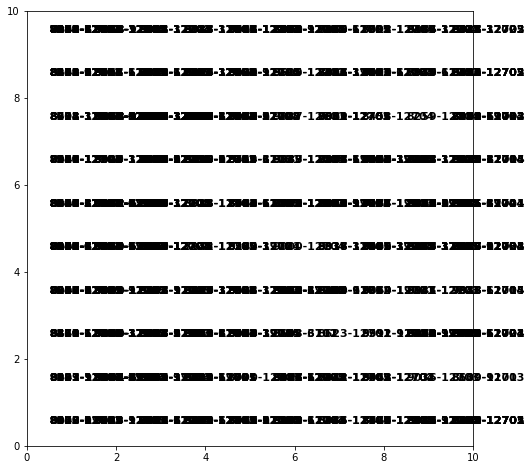

<Figure size 432x288 with 0 Axes>

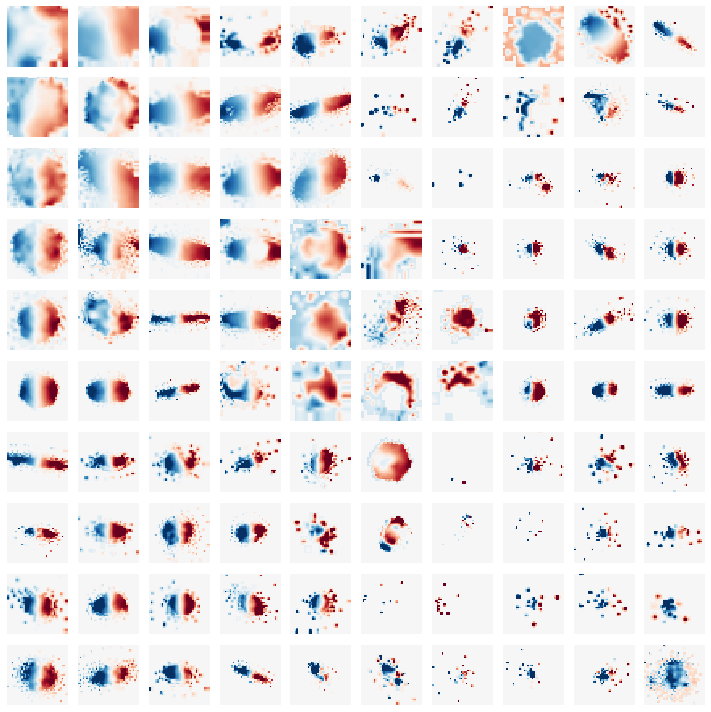

In [48]:
# This will plot the kinematic maps on the SOM space

num = ifu_name
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
wmap = {}
im = 0
for x, t in zip(MB_matrix_zeros, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    #imscatter(w[0]+.5,w[1]+.5, np.ma.masked_where(im==0, im), ax=ax1, zoom=0.4)

    ax1.text(w[0]+.5,  w[1]+.5,  str(t), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
ax1.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])

plt.savefig('som.png')

plt.show()

plt.clf()
plt.figure(figsize=(dim_som,dim_som), facecolor='white')
cnt = 0
for j in reversed(range(dim_som)):  # images mosaic
    for i in range(dim_som):
        plt.subplot(dim_som, dim_som, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(np.reshape(MB_matrix_zeros[wmap[(i, j)]],(shape, shape)),
                       cmap='RdBu_r', norm=MidpointNormalize(midpoint=0, vmin=-3, vmax=3))
        else:
            #continue
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
#plt.savefig('som_imgs_derot_zeros_'+str(dim_som)+'.pdf')
plt.show()

# Interesting result here

### Now, implement a k-menas clustering on this
The point is to see if you can pull useful information out of 500 galaxies worth of k-means

check 1 False
check 2 True
(762, 1444)
[1 2 0 1 2 1 1 2 1 0 1 2 0 1 2 1 0 1 1 2 1 1 2 0 2 0 2 2 1 2 2 2 2 1 1 0 0
 0 1 1 0 0 1 2 2 2 0 2 1 1 1 1 2 1 2 0 0 1 0 1 1 1 1 1 2 2 2 2 1 0 1 2 1 2
 2 2 2 2 2 1 2 1 2 2 0 0 0 1 1 0 0 0 0 2 2 2 1 1 2 0 2 1 2 1 2 2 1 1 1 2 2
 1 2 2 0 2 1 2 1 0 2 0 1 1 0 2 0 1 0 1 2 1 2 0 0 0 1 0 0 0 2 0 0 2 0 0 0 1
 2 1 1 0 0 0 2 2 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 2 2 0 2 2 1 0 2 1 2 2 1
 2 2 0 1 1 1 0 0 0 1 0 1 1 2 1 1 0 1 0 0 2 1 0 2 0 1 2 0 2 2 0 0 1 1 1 0 2
 0 0 0 0 0 0 0 2 2 2 0 2 1 0 2 0 0 0 0 0 1 0 1 2 0 0 2 1 2 0 2 0 0 1 0 0 2
 2 2 0 0 2 0 2 0 2 2 1 2 1 0 0 0 1 0 2 0 0 0 0 2 0 1 2 0 2 2 0 1 0 1 0 0 2
 2 2 0 1 1 1 0 1 1 2 1 0 2 1 1 0 0 0 2 0 1 0 2 0 2 1 2 0 0 1 1 1 2 0 1 1 2
 0 1 0 1 0 2 1 2 1 2 0 1 0 0 1 1 1 1 2 0 0 2 1 1 0 0 2 0 0 0 1 0 1 1 2 0 0
 2 1 0 0 0 2 2 0 0 2 1 0 0 0 0 2 2 0 2 2 2 2 1 1 0 0 0 0 0 1 2 2 1 0 1 1 2
 2 2 1 2 1 0 2 1 2 1 2 2 2 0 0 2 1 0 2 1 0 2 1 1 1 0 1 1 1 1 2 2 2 2 2 1 0
 2 1 2 2 1 0 1 1 1 0 2 1 2 1 0 0 0 2 2 2 1 0 1 1 0 2 2 2 0 0 

<Figure size 432x288 with 0 Axes>

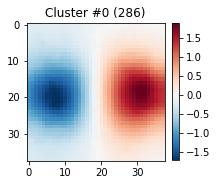

This is the number of galaxies in this cluster 286


<Figure size 432x288 with 0 Axes>

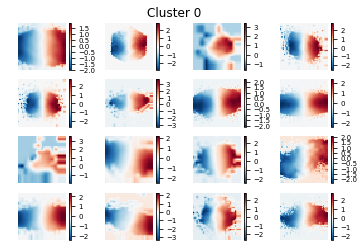

<Figure size 432x288 with 0 Axes>

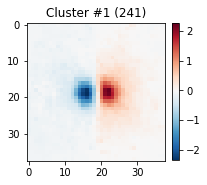

This is the number of galaxies in this cluster 241


<Figure size 432x288 with 0 Axes>

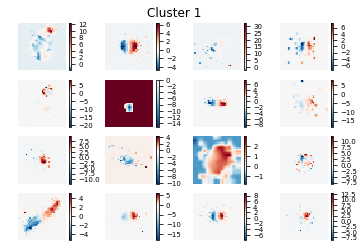

<Figure size 432x288 with 0 Axes>

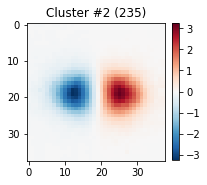

This is the number of galaxies in this cluster 235


<Figure size 432x288 with 0 Axes>

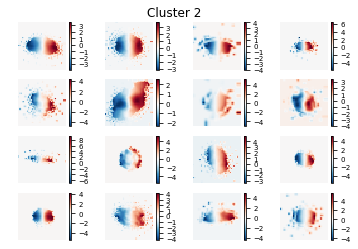

{0: ['8555-12703', '8458-12702', '8946-12703', '9509-12704', '9037-12703', '8250-12702', '9485-12705', '8550-12702', '8717-6102', '7968-3703', '8938-12703', '8484-12703', '8258-12703', '8455-12702', '8447-12701', '9029-12705', '8332-12703', '9041-12702', '9864-12705', '8332-12702', '9041-12703', '9864-12704', '8720-12703', '8481-12703', '9026-12702', '9044-12702', '8329-3703', '7964-12702', '8996-3702', '8313-12705', '7960-9101', '8944-6103', '8940-3703', '8938-12702', '9195-6101', '8253-6103', '8604-12704', '8335-12705', '9196-6103', '8138-3702', '9485-12704', '8591-6101', '7443-9101', '8249-12702', '8591-3704', '8549-12702', '8452-12704', '8077-12705', '9195-12702', '8936-12701', '8946-12702', '8331-12701', '8458-12703', '9181-12704', '8313-12702', '8990-12703', '9048-6103', '7977-12703', '8258-12705', '8606-12705', '9047-3702', '7991-12702', '8139-3703', '7972-12702', '8595-12704', '9184-12705', '8603-12704', '9088-12701', '9864-12703', '9041-12704', '8332-12705', '8320-9101', '8997

NameError: name 'STOP' is not defined

In [53]:
# The initial problem with clustering is that when you go from 2 to 3 clusters, there are galaxies
# that occupy clusters by themselves, so I would like to remove them from the sample
# at least so they're not part of the clustering

data_cluster = MB_matrix_cleaned
# options: projected or MB_matrix_cleaned


print('check 1', np.any(np.isnan(data_cluster))) # you want this to be False
print('check 2', np.all(np.isfinite(data_cluster))) # and this to be true


#np.ma.masked_where(np.isnan(map_ml_all_stel), map_ml_all_stel)
#print(data_cluster[len(plates)-1])


from sklearn.cluster import KMeans
nclusters=3
kmeans = KMeans(n_clusters=nclusters, random_state=0)
print(np.shape(data_cluster))
clusters = kmeans.fit_predict(data_cluster)
print(clusters)
print(np.shape(kmeans.cluster_centers_))
centers = kmeans.cluster_centers_.reshape(nclusters, shape, shape)

# These are meant to be repopulated every time you cut the galaxies
bad_galaxies = np.zeros(np.shape(data_cluster))
bad_galaxies_ifus = []
fill_frac_list = {}
vel_list = {}

counter=0

from scipy.stats import mode

for i in range(nclusters):
    
    
    cluster={}
    ifu={}
    #cluster_name=[]
    for n in range(nclusters):

        cluster[n]=[]
        ifu[n]=[]
        #cluster_d[n]=[]
        for j in range(np.shape(data_cluster)[0]):
            if clusters[j]==n:
                cluster[n].append(np.reshape(data_cluster[j,:],(shape,shape)))
                ifu[n].append(ifu_name[j])
        #cluster_name.append(str(cluster[n]))
        if len(ifu[n])==1:
            if ifu[n] in bad_galaxies_ifus:
                continue
            bad_galaxies_ifus.append(ifu[n])
            #bad_galaxies_ifus_master.append(ifu[n])
            print(np.shape(cluster[n][0]))
            bad_galaxies[counter,:,:] = cluster[n][0]
            #bad_galaxies_master[counter_master,:,:] = cluster[n][0]
            counter+=1
            #counter_master+=1
    nclusters_list = np.arange(0,nclusters)
    # Now run some statistics of each cluster
    # Like how many spaxels are in the cluster on average
    fill_frac_list[i] = []
    vel_list[i] = []
    full = np.shape(centers[i])[0]**2
    
    
    
    for j in range(np.shape(cluster[i])[0]):
        
        fill = np.count_nonzero(cluster[i][j])/full
        fill_frac_list[i].append(fill)
        
        flat = cluster[i][j].flatten()
        list_vel = flat[np.nonzero(flat)]
        for p in range(len(list_vel)):
            vel_list[i].append(list_vel[p])
    
    plt.clf()
    fig = plt.figure()
    ax0 = fig.add_subplot(121)
    im0 = ax0.imshow(centers[i], cmap='RdBu_r',norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
    plt.colorbar(im0, fraction=0.045)
    plt.title('Cluster #'+str(i)+' ('+str(np.shape(cluster[i])[0])+')')
    plt.show()
    
    #continue
    
    if np.shape(cluster[i])[0] ==1:
        continue
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    plt.axis('off')
    print('This is the number of galaxies in this cluster '+str(np.shape(cluster[i])[0]))
    
    if np.shape(cluster[i])[0] < 16:
            if np.shape(cluster[i])[0] < 9:
                if np.shape(cluster[i])[0] < 4:
                    for j in range(np.shape(cluster[i])[0]):
                        ax = fig.add_subplot(2,2,j+1)
                        im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                        plt.colorbar(im)
                        ax.axis('off')
                    plt.show()

                else:
                    for j in range(np.shape(cluster[i])[0]):
                        ax = fig.add_subplot(3,3,j+1)
                        im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                        plt.colorbar(im)
                        ax.axis('off')
                    plt.show()
            else:
                for j in range(np.shape(cluster[i])[0]):
                    ax = fig.add_subplot(4,4,j+1)
                    im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
                    plt.colorbar(im)
                    ax.axis('off')
                plt.show()
    else:
        for j in range(16):
            ax = fig.add_subplot(4,4,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0))#, vmin=-100, vmax=100)
            cbar = plt.colorbar(im)
            cbar.ax.tick_params(labelsize=7) 
            ax.axis('off')
        plt.show()
        
print(ifu)
STOP

    # Okay so if there's only one object in a cluster delete that object and add it to 'bad list'
    
# plot fill fraction
plt.clf()
for j in range(len(fill_frac_list)):
    print('fill frac cluster '+str(j))
    print(fill_frac_list[j])
    plt.hist(fill_frac_list[j], label='Cluster #'+str(j), alpha=0.25, normed=True)
plt.legend()
plt.xlim([0,1])
plt.xlabel('Fill Fraction')
plt.show()

# plot velocities
binwidth = 50

for j in range(len(fill_frac_list)):
    #print(vel_list[j])
    plt.clf()
    
    plt.hist(vel_list[j], label='Cluster #'+str(j), alpha=0.25, bins=np.linspace(-200, 200, binwidth), normed=True)
    plt.legend()
    plt.xlabel('Velocities')
    plt.axvline(x = np.mean(vel_list[j]))
    plt.annotate('Mean Velocity = '+str(round(np.mean(vel_list[j]),1)), xy = (0.02, 0.9), xycoords='axes fraction')
    #plt.xlim([0,1])
    plt.show()
    
    
